In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sibulator import *

In [26]:
fbi_samples = pd.read_csv('fbi_dataset.csv').rename({'THO1':'TH01', 'THO1.1':'TH01.1'}, axis=1)
with open('fbi_dataset_metadata.json', 'r') as f:
    metadata = json.load(f)

In [27]:
fbi_samples.head()

,ID#,D3S1358,D3S1358.1,vWA,vWA.1,FGA,FGA.1,D8S1179,D8S1179.1,D21S11,...,LDLR,LDLR.1,GYPA,GYPA.1,HBGG,HBGG.1,D7S8,D7S8.1,Gc,Gc.1
0,B0600,15.0,17,15,16,23.0,27.0,12,13,28.0,...,B,B,A,A,B,B,A,A,B,B
1,B0601,14.0,15,16,16,23.0,24.0,14,17,28.0,...,A,B,A,B,A,B,A,A,B,B
2,B0602,15.0,15,16,17,24.0,25.0,11,13,30.0,...,B,B,A,B,A,B,A,A,B,C
3,B0603,16.0,16,17,18,21.0,22.0,11,14,27.0,...,A,A,A,A,A,B,A,B,B,C
4,B0604,14.0,14,14,14,20.0,27.0,12,15,29.0,...,B,B,A,A,A,B,A,B,C,C


In [28]:
metadata

{'AFRICAN AMERICAN': 210,
 'U.S. CAUCASIAN': 203,
 'SOUTHWESTERN HISPANIC': 209,
 'BAHAMIAN': 162,
 'JAMAICAN': 244,
 'TRINIDADIAN': 85}

In [29]:
starting_idx = np.cumsum([0] + list(metadata.values()))
starting_idx

array([   0,  210,  413,  622,  784, 1028, 1113])

In [35]:
float_cols = []
for col in fbi_samples:
    try:
        fbi_samples[col] = fbi_samples[col].astype(float)
        if '.1' not in col:
            float_cols.append(col)
    except:
        print(col)
float_cols = float_cols[:-1]
print(len(float_cols)) # number of loci

ID#
HLA-DQA1
HLA-DQA1.1
LDLR
LDLR.1
GYPA
GYPA.1
HBGG
HBGG.1
D7S8
D7S8.1
Gc
Gc.1
13


In [36]:
known_samples = []
for i, row in fbi_samples.iterrows():
    sample = {}
    for col in float_cols:
        sample[col] = row[[col, col + '.1']].values.tolist()
    known_samples.append(sample)

In [37]:
allele_freq.keys()

dict_keys(['D3S1358', 'D1S1656', 'D2S441', 'D10S1248', 'D13S317', 'Penta E', 'D16S539', 'D18S51', 'D2S1338', 'CSF1PO', 'Penta D', 'TH01', 'vWA', 'D21S11', 'D7S820', 'D5S818', 'TPOX', 'DYS391', 'D8S1179', 'D12S391', 'D19S433', 'FGA', 'D22S1045'])

In [48]:
use_freq = 'nist'
allele_freq = load_allele_frequencies(use_freq)
sample_overlaps = []
for i, k in enumerate(metadata.keys()):
    if k == 'AFRICAN AMERICAN':
        subpop = 'AfAm'
    elif k == 'U.S. CAUCASION':
        subpop = 'Cauc'
    elif k == 'SOUTHWESTERN HISPANIC':
        subpop = 'Hisp'
    else:
        continue
        
    start_idx = starting_idx[i]
    end_idx = starting_idx[i+1]
    subpop_samples = known_samples[start_idx:end_idx]
    for sample in subpop_samples:
        sim_sample = generate_one_sample(sample, allele_freq, subpop)
        
        overlap = 0
        for k in sample.keys():
            ks_alleles = sample[k]
            ss_alleles = sim_sample[k]
            for j in range(len(ks_alleles)):
                if ks_alleles[j] == ss_alleles[j]:
                    overlap += 1
        sample_overlaps.append( overlap )
# for sample in known_samples[:10]:
#     sample = generate_sibling_samples(known_sample, use_freq, subpop, num_siblings)

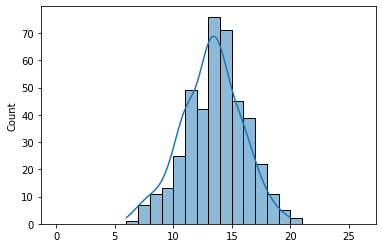

In [55]:
sns.histplot(sample_overlaps, bins=np.linspace(0,26,27), kde=True)
plt.show()